<a href="https://colab.research.google.com/github/rahulgundre/SHALA2020/blob/master/Machine%20Learning/ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [4]:
attrition_data.shape

(1028, 34)

In [6]:
attrition_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae838fda0>,
      dtype=object)

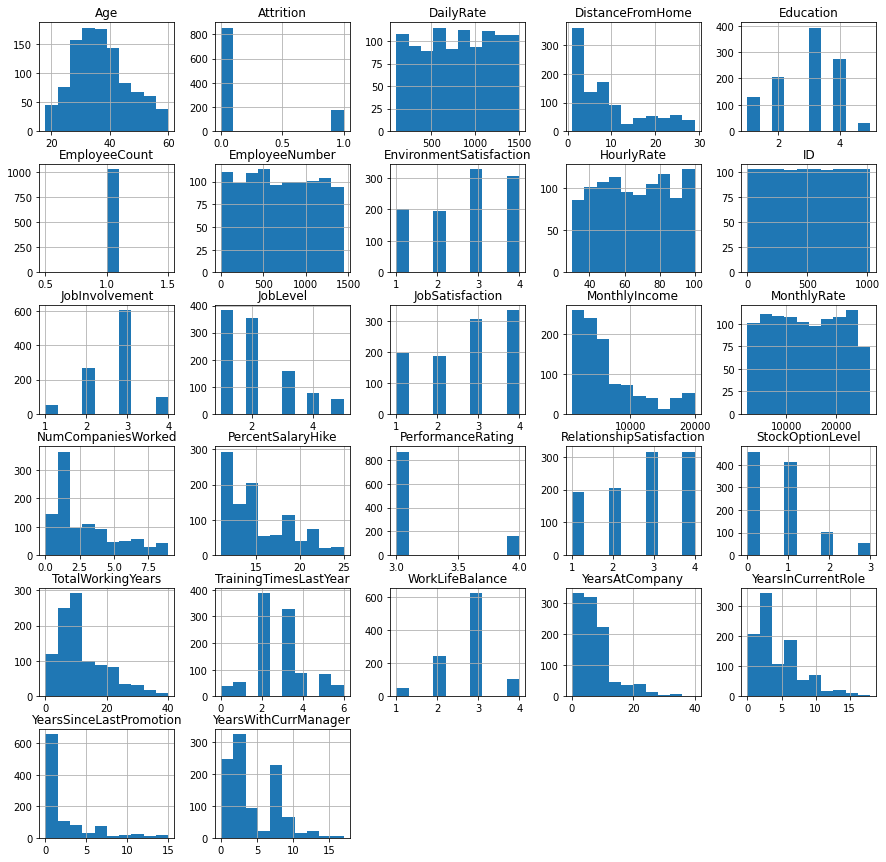

In [7]:
attrition_data.hist(figsize=(15,15))

In [0]:
# by seeing the histogram 'EmployeeCount','EmployeeNumber','ID' are relunctant
# removing these features 
attrition_data.drop(columns=['EmployeeCount','EmployeeNumber','ID'], axis=1, inplace=True)

In [9]:
attrition_data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [14]:
# categorical and numerical variables
categorical = [var for var in attrition_data.columns if attrition_data[var].dtype=='O']
print("Categorical variables are:",categorical)
numerical = [var for var in attrition_data.columns if attrition_data[var].dtype!='O']
print("Numerical variables are:",numerical)


Categorical variables are: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical variables are: ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [37]:
# seperating categorical and numerical data
cat_features = attrition_data[categorical]
num_features = attrition_data[numerical]
num_features.drop('Attrition', axis=1, inplace=True)
cat_features.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [38]:
# converting categorical data into numerical 
from sklearn.preprocessing import LabelEncoder
cat_features = cat_features.apply(LabelEncoder().fit_transform)
cat_features.tail()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
1023,2,1,1,0,6,1,0
1024,2,1,3,0,5,1,0
1025,2,2,3,0,7,1,1
1026,2,2,2,1,7,1,0
1027,2,1,1,0,2,1,0


In [60]:
# combining both categorical and numerical data
x = pd.concat([cat_features, num_features], axis=1) # features 
print(x.head())

# label 
y = attrition_data['Attrition']
# y.head()

   BusinessTravel  Department  ...  YearsSinceLastPromotion  YearsWithCurrManager
0               2           2  ...                        0                     5
1               1           1  ...                        1                     7
2               2           1  ...                        0                     0
3               1           1  ...                        3                     0
4               2           1  ...                        2                     2

[5 rows x 30 columns]


In [61]:
x.describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,1.609922,1.265564,2.240272,0.580739,4.491245,1.107004,0.293774,36.999027,806.551556,9.010700,2.873541,2.719844,65.451362,2.731518,2.093385,2.757782,6632.573930,14243.531128,2.697471,15.172179,3.152724,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051
std,0.660898,0.515109,1.318601,0.493678,2.414844,0.739898,0.455712,9.444297,407.043735,8.078418,1.032840,1.089614,20.274229,0.703240,1.141854,1.105306,4855.747841,7048.768076,2.527534,3.647641,0.359896,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,30.000000,465.750000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,8259.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,2.000000,1.000000,2.000000,1.000000,5.000000,1.000000,0.000000,36.000000,813.000000,7.000000,3.000000,3.000000,65.000000,3.000000,2.000000,3.000000,4907.500000,14074.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2.000000,2.000000,3.000000,1.000000,7.000000,2.000000,1.000000,43.000000,1157.250000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8729.500000,20342.250000,4.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2.000000,2.000000,5.000000,1.000000,8.000000,2.000000,1.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcae2cbf5c0>,
      dtype=object)

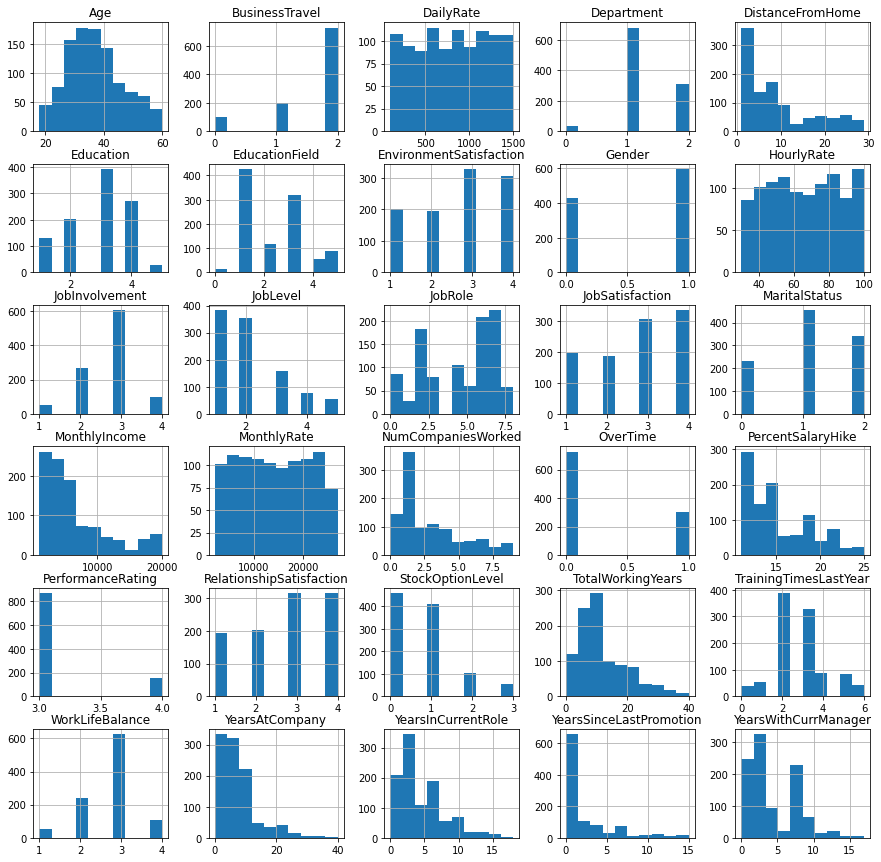

In [62]:
x.hist(figsize=(15,15))

In [63]:
# normalising the features 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_norm = pd.DataFrame(x_scale, columns=x.columns)
x_norm.describe()

[[1.         1.         0.2        ... 0.22222222 0.         0.29411765]
 [0.5        0.5        0.2        ... 0.38888889 0.06666667 0.41176471]
 [1.         0.5        0.8        ... 0.         0.         0.        ]
 ...
 [1.         1.         0.6        ... 0.22222222 0.         0.17647059]
 [1.         1.         0.4        ... 0.16666667 0.         0.17647059]
 [1.         0.5        0.2        ... 0.22222222 0.         0.11764706]]


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,0.804961,0.632782,0.448054,0.580739,0.561406,0.553502,0.293774,0.452358,0.504332,0.286096,0.468385,0.573281,0.506448,0.577173,0.273346,0.585927,0.296133,0.487835,0.299719,0.298013,0.152724,0.577497,0.252918,0.285433,0.461576,0.587873,0.177505,0.236868,0.147341,0.243591
std,0.330449,0.257554,0.263720,0.493678,0.301855,0.369949,0.455712,0.224864,0.291370,0.288515,0.258210,0.363205,0.289632,0.234413,0.285464,0.368435,0.255700,0.283026,0.280837,0.260546,0.359896,0.362925,0.278745,0.200386,0.217086,0.234335,0.157907,0.201688,0.219237,0.212262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,0.200000,0.000000,0.250000,0.500000,0.000000,0.285714,0.260379,0.035714,0.250000,0.333333,0.257143,0.333333,0.000000,0.333333,0.098841,0.247571,0.111111,0.071429,0.000000,0.333333,0.000000,0.150000,0.333333,0.333333,0.075000,0.111111,0.000000,0.117647
50%,1.000000,0.500000,0.400000,1.000000,0.625000,0.500000,0.000000,0.428571,0.508948,0.214286,0.500000,0.666667,0.500000,0.666667,0.250000,0.666667,0.205292,0.481048,0.222222,0.214286,0.000000,0.666667,0.333333,0.250000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471
75%,1.000000,1.000000,0.600000,1.000000,0.875000,1.000000,1.000000,0.595238,0.755369,0.428571,0.750000,1.000000,0.757143,0.666667,0.500000,1.000000,0.406556,0.732714,0.444444,0.500000,0.000000,1.000000,0.333333,0.400000,0.500000,0.666667,0.225000,0.388889,0.200000,0.411765
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Features and Label
X = x_norm # features
Y = y   # label


#Creating model


##01 Random Forest

In [0]:
# Random forest 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 108)

In [269]:
# size of train and test data
print("size of training data {}\nsize of testing data {}".format(len(x_train),len(x_test)))

size of training data 822
size of testing data 206


In [270]:
# training model 
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=108)
model1.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=108,
                       verbose=0, warm_start=False)

In [271]:
model1.score(x_test, y_test)

0.8300970873786407

In [273]:
# confusion matrix
y_pred = model1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[165,   3],
       [ 32,   6]])

Accuracy, precision, recall using Random forest

In [274]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8300970873786407

In [275]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       168
           1       0.67      0.16      0.26        38

    accuracy                           0.83       206
   macro avg       0.75      0.57      0.58       206
weighted avg       0.81      0.83      0.78       206



Hyperparameter tuning

In [0]:
param_dist_rf = {
    'criterion':['gini','entropy'],
    'n_estimators':[150,200,250]
}

In [281]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(model1, param_grid=param_dist_rf, cv=10, n_jobs=-1)
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, r

In [282]:
grid_rf.best_score_

0.8564795768439613

In [283]:
grid_rf.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 250}

##02 Decision tree classifier


In [285]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=2 , random_state=108)  # based on parameter tuning
model2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=108, splitter='best')

In [286]:
model2.score(x_test,y_test)

0.8203883495145631

In [287]:
y_pred_dtc = model2.predict(x_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[160,   8],
       [ 29,   9]])

In [288]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       168
           1       0.53      0.24      0.33        38

    accuracy                           0.82       206
   macro avg       0.69      0.59      0.61       206
weighted avg       0.79      0.82      0.79       206



Parameter tuning - decision tree classifier

In [289]:
param_dist = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None]
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model2,param_grid=param_dist, cv=10)
grid.fit(x_train, y_train)
grid.best_estimator_
grid.best_score_
grid.best_params_  # best parameters 

{'criterion': 'entropy', 'max_depth': 2}

## 03 K neighbour classifier

In [290]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
model3 = neighbors.KNeighborsClassifier(algorithm = 'auto', n_neighbors=5, weights='uniform')
model3.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [291]:
model3.score(x_test,y_test)

0.8349514563106796

In [0]:
y_pred_knn = model3.predict(x_test)

In [293]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       168
           1       0.75      0.16      0.26        38

    accuracy                           0.83       206
   macro avg       0.79      0.57      0.58       206
weighted avg       0.82      0.83      0.79       206



hyperparameter tuning

In [0]:
param_dist_knn = {
    'n_neighbors':[3,5,7,10],
    'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
    'weights':['uniform','distance']
}

In [295]:
grid_knn = GridSearchCV(model3, param_grid=param_dist_knn, cv=10)
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [297]:
grid_knn.best_score_

0.8418160446664708

# Comparision between models

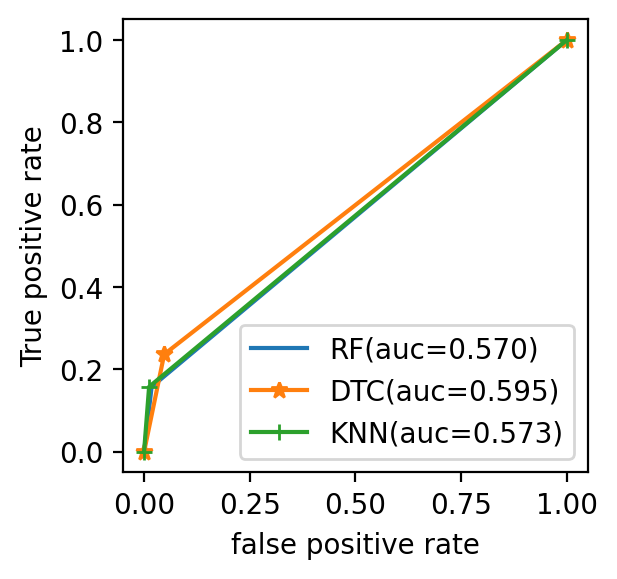

In [302]:
from sklearn.metrics import roc_curve, auc
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred)  # random forest
dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc) # decision tree classifier
knn_fpr, knn_tpr, thrshold = roc_curve(y_test, y_pred_knn) # knn 
rf_auc = auc(rf_fpr, rf_tpr)
dtc_auc = auc(dtc_fpr,dtc_tpr)
knn_auc = auc(knn_fpr,knn_tpr)
# plotting
plt.figure(figsize=(3,3), dpi = 200)
plt.plot(rf_fpr, rf_tpr, linestyle ='-', label='RF(auc=%0.3f)'% rf_auc)
plt.plot(dtc_fpr,dtc_tpr, marker ='*', label='DTC(auc=%0.3f)'% dtc_auc)
plt.plot(knn_fpr,knn_tpr, marker ='+', label='KNN(auc=%0.3f)'% knn_auc)
plt.xlabel("false positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

# So **Decision tree classifier** is best classifier among the three classifiers.

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  